# 1. Analisi de les dades

In [ ]:
import pandas as pd
import requests, io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Dades dels apartaments Airbnb




In [ ]:
data = pd.read_csv('https://github.com/paubernabe/data/blob/main/juliol.csv?raw=true')
print(data.shape)
data.head(5)

(17079, 74)


,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,18674,https://www.airbnb.com/rooms/18674,20210707180233,2021-07-07,Huge flat for 8 people close to Sagrada Familia,110m2 apartment to rent in Barcelona. Located ...,Apartment in Barcelona located in the heart of...,https://a0.muscache.com/pictures/13031453/413c...,71615,https://www.airbnb.com/users/show/71615,Mireia And Maria,2010-01-19,"Barcelona, Catalonia, Spain","We are Mireia (43) & Maria (45), two multiling...",within an hour,98%,81%,f,https://a0.muscache.com/im/users/71615/profile...,https://a0.muscache.com/im/users/71615/profile...,la Sagrada Família,34.0,34.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Barcelona, CT, Spain",la Sagrada Família,Eixample,41.40556,2.17262,Entire apartment,Entire home/apt,8,NaN,2 baths,3.0,6.0,"[""Washer"", ""Host greets you"", ""Iron"", ""Hair dr...",$169.00,1,1125,1.0,3.0,1125.0,1125.0,2.0,1125.0,NaN,t,0,0,0,60,2021-07-07,21,0,0,2014-03-02,2019-10-11,4.40,4.55,4.75,4.80,4.90,4.75,4.30,HUTB-002062,t,18,18,0,0,0.23
1,23197,https://www.airbnb.com/rooms/23197,20210707180233,2021-07-08,Forum CCIB DeLuxe★Spacious &Elegant★Large Balcony,"Beautiful spacious apartment, large terrace, 5...",Strategically located in the Parc del Fòrum ar...,https://a0.muscache.com/pictures/738532/806da1...,90417,https://www.airbnb.com/users/show/90417,Etain (Marnie),2010-03-09,"Catalonia, Spain","Hi. I'm Etain, though everyone calls me by my...",within a few hours,100%,67%,f,https://a0.muscache.com/im/users/90417/profile...,https://a0.muscache.com/im/users/90417/profile...,El Besòs i el Maresme,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Sant Adria de Besos, Barcelona, Spain",el Besòs i el Maresme,Sant Martí,41.41291,2.22063,Entire apartment,Entire home/apt,6,NaN,2 baths,3.0,5.0,"[""Washer"", ""Iron"", ""Hair dryer"", ""Security cam...",$240.00,3,300,3.0,6.0,1125.0,1125.0,3.5,1125.0,NaN,t,17,47,77,169,2021-07-08,52,0,0,2016-01-05,2019-12-15,4.74,4.92,4.92,4.94,4.98,4.67,4.69,HUTB-005057,f,2,2,0,0,0.78
2,32711,https://www.airbnb.com/rooms/32711,20210707180233,2021-07-08,Sagrada Familia area - Còrsega 1,A lovely two bedroom apartment only 250 m from...,What's nearby <br />This apartment is located...,https://a0.muscache.com/pictures/357b25e4-f414...,135703,https://www.airbnb.com/users/show/135703,Nick,2010-05-31,"Barcelona, Catalonia, Spain",I'm Nick your English host in Barcelona.\r\n\r...,within a day,83%,100%,f,https://a0.muscache.com/im/users/135703/profil...,https://a0.muscache.com/im/users/135703/profil...,Camp d'en Grassot i Gràcia Nova,5.0,5.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,"Barcelona, Catalonia, Spain",el Camp d'en Grassot i Gràcia Nova,Gràcia,41.40566,2.1

### Tipus de dades

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17079 entries, 0 to 17078
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            17079 non-null  int64  
 1   listing_url                                   17079 non-null  object 
 2   scrape_id                                     17079 non-null  int64  
 3   last_scraped                                  17079 non-null  object 
 4   name                                          17069 non-null  object 
 5   description                                   16947 non-null  object 
 6   neighborhood_overview                         10401 non-null  object 
 7   picture_url                                   17079 non-null  object 
 8   host_id                                       17079 non-null  int64  
 9   host_url                                      17079 non-null 

### Distribució de les dades

#### Preu

In [ ]:
def clean_str(x):
    x = x.replace("$", "").replace(",", "").replace(" ", "")
    return float(x)


data['price'] = data['price'].apply(clean_str)

Text(0, 0.5, 'Number of listings')

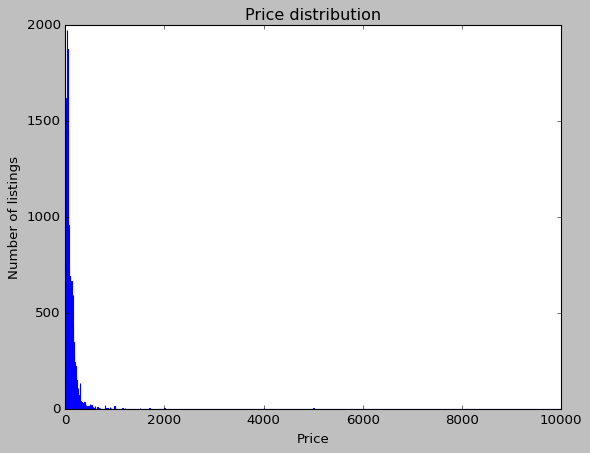

In [ ]:
plt.hist(data['price'], color = 'blue', edgecolor = 'blue',
         bins = 1000)

plt.title('Price distribution')
plt.xlabel('Price')
plt.ylabel('Number of listings')

(0.0, 1000.0)

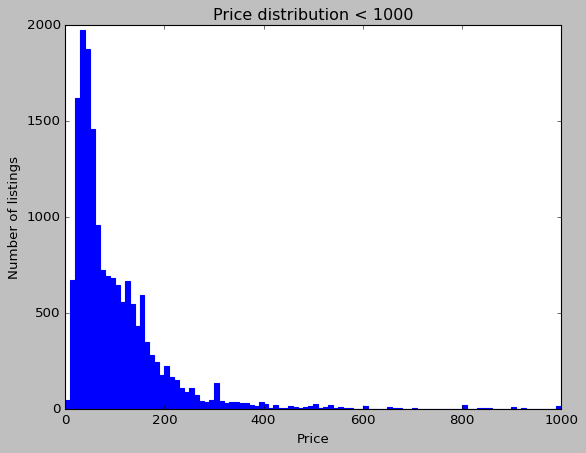

In [ ]:
plt.hist(data['price'], color = 'blue', edgecolor = 'blue',
         bins = 1000)

plt.title('Price distribution < 1000')
plt.xlabel('Price')
plt.ylabel('Number of listings')
plt.xlim([0, 1000])

#### Tipus d'habitació

In [ ]:
def bar_plot_object(title,data,xlab,ylab):
  x = list(data.value_counts().keys())
  x = x[::-1]
  y = list(data.value_counts())
  y = y[::-1]
  plt.barh(x,y)
  plt.xlabel(xlab)
  plt.ylabel(ylab)
  plt.title(title)
  return None


def explore_col(column,x,y):
  bar_plot_object(column+" histogram",data[column],x,y)
  print(column,'description\n', data[column].describe())
  print('Top 5 frequent:',data[column].value_counts()[:5].index.tolist())

room_type description
 count               17079
unique                  4
top       Entire home/apt
freq                 8893
Name: room_type, dtype: object
Top 5 frequent: ['Entire home/apt', 'Private room', 'Hotel room', 'Shared room']


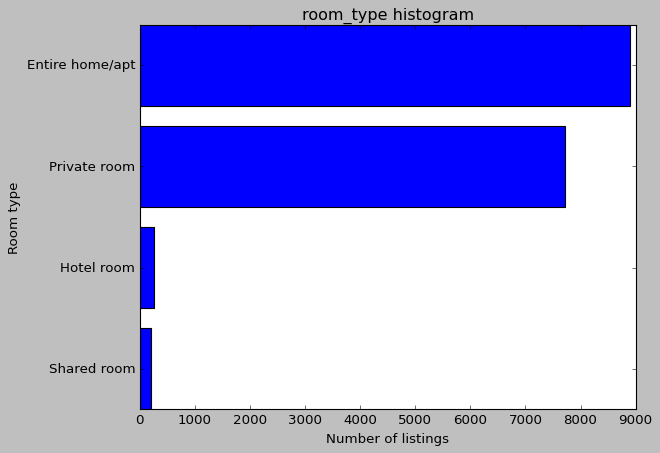

In [ ]:
explore_col('room_type', 'Number of listings', 'Room type')

#### Nombre d'apartaments per barri

neighbourhood_group_cleansed description
 count        17079
unique          10
top       Eixample
freq          5931
Name: neighbourhood_group_cleansed, dtype: object
Top 5 frequent: ['Eixample', 'Ciutat Vella', 'Sants-Montjuïc', 'Sant Martí', 'Gràcia']


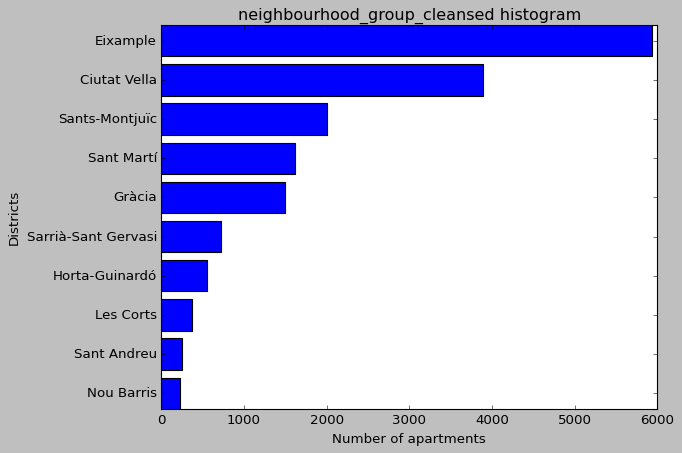

In [ ]:
explore_col('neighbourhood_group_cleansed', 'Number of apartments', 'Districts')

#### Geolocalització i preu

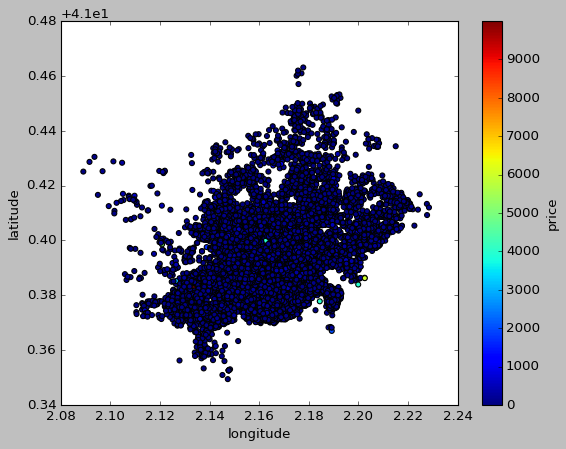

In [ ]:
data.plot(x="longitude", y="latitude", kind="scatter", c="price",
        cmap=plt.get_cmap('jet'), colorbar=True)

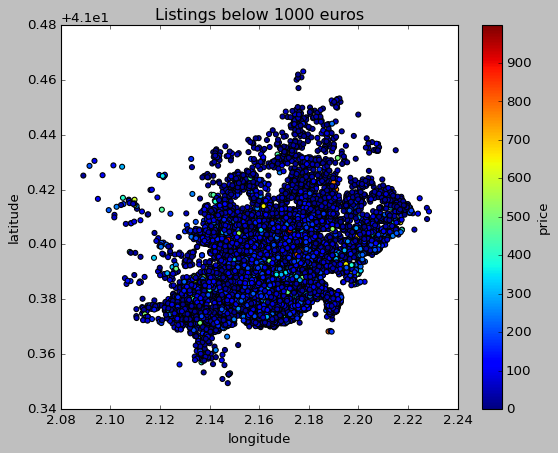

In [ ]:
#agafem els apartaments amb un preu/nit menor a 1000 euros

data[data['price'] < 1000].plot(title='Listings below 1000 euros', x="longitude", y="latitude", kind="scatter", c="price",
        cmap=plt.get_cmap('jet'), colorbar=True)

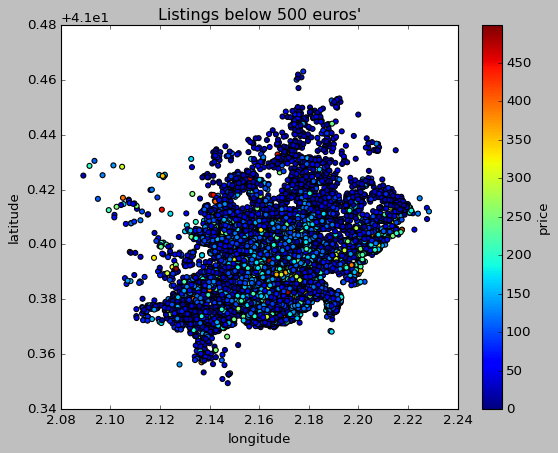

In [ ]:
data[data['price'] < 500].plot(title="Listings below 500 euros'", x="longitude", y="latitude", kind="scatter", c="price",
        cmap=plt.get_cmap('jet'), colorbar=True)

#### Geolocalització i tipus d'habitació

Text(0.5, 1.0, 'Type of room by neigbourhood')

<Figure size 1040x560 with 0 Axes>

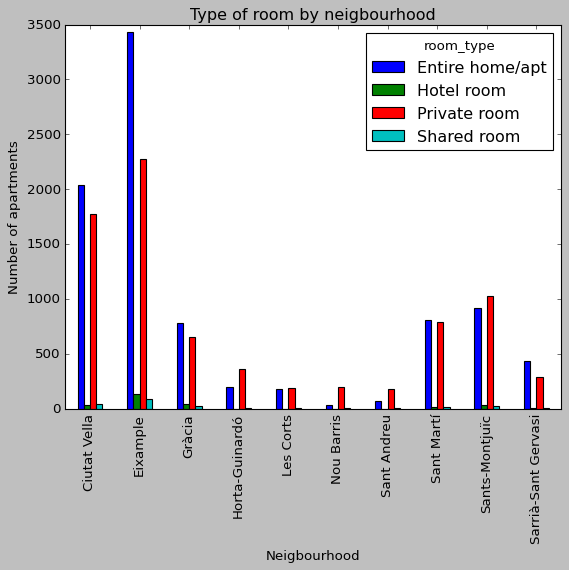

In [ ]:
plt.figure(figsize=(13,7))
df = data.groupby(['neighbourhood_group_cleansed','room_type']).size().unstack(fill_value=0)
df.plot(kind="bar")
plt.xlabel('Neigbourhood', fontsize=12)
plt.ylabel('Number of apartments', fontsize=12)
plt.title('Type of room by neigbourhood')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


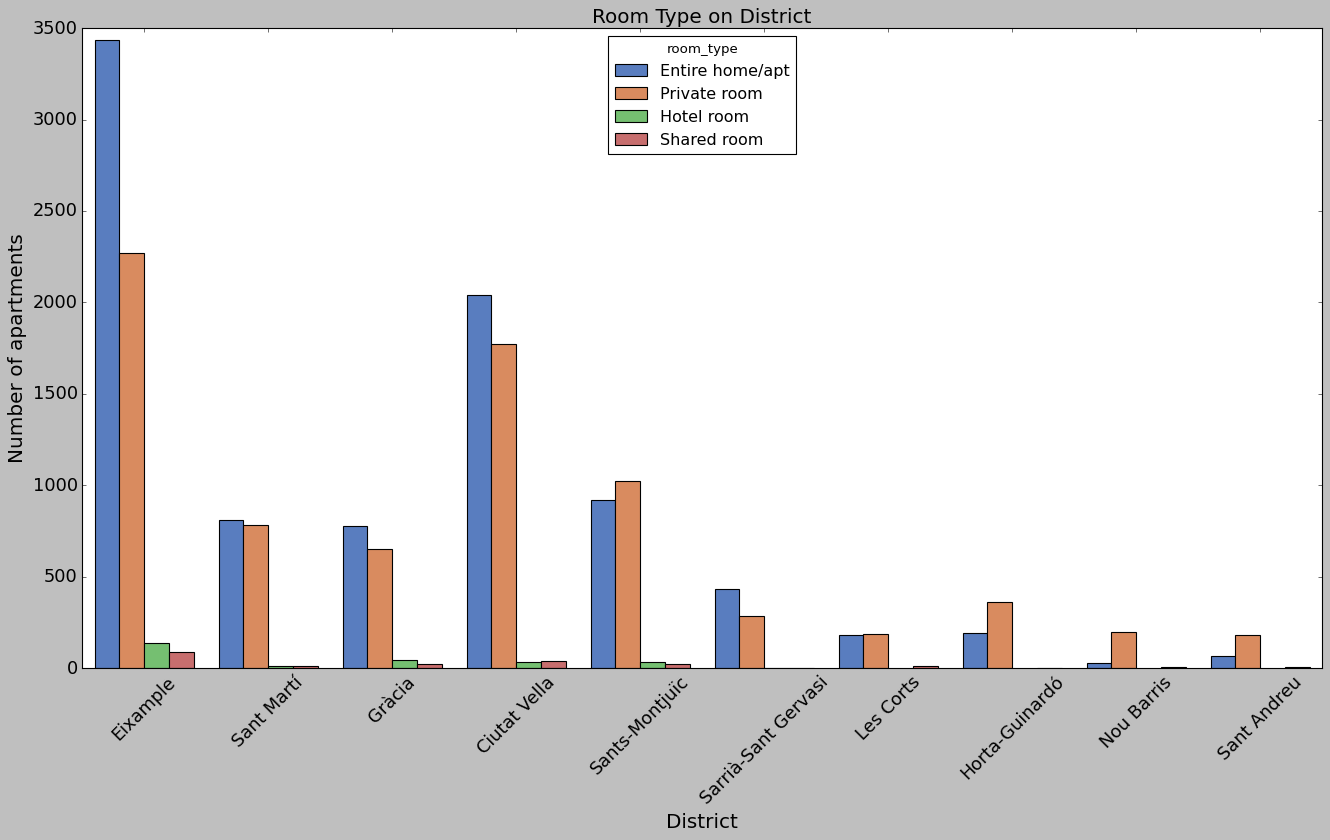

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Room Type on District", fontsize=18)
sns.countplot(data.neighbourhood_group_cleansed,hue=data.room_type, palette="muted")
plt.xlabel('District', fontsize=18)
plt.ylabel('Number of apartments', fontsize=18)
plt.xticks(fontsize=16, rotation=45)
plt.yticks(fontsize=16)

plt.show()

Text(0.5, 1.0, 'Type of room by neigbourhood')

<Figure size 1040x560 with 0 Axes>

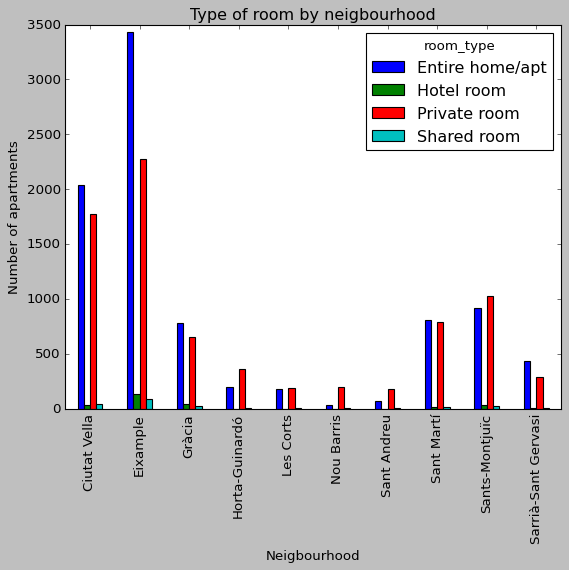

In [ ]:
plt.figure(figsize=(13,7))
df = data.groupby(['neighbourhood_group_cleansed','room_type']).size().unstack(fill_value=0)
df.plot(kind="bar")
plt.xlabel('Neigbourhood', fontsize=12)
plt.ylabel('Number of apartments', fontsize=12)
plt.title('Type of room by neigbourhood')

### Preu mitjà per districte

Text(0.5, 1.0, 'Neibourhood mean price')

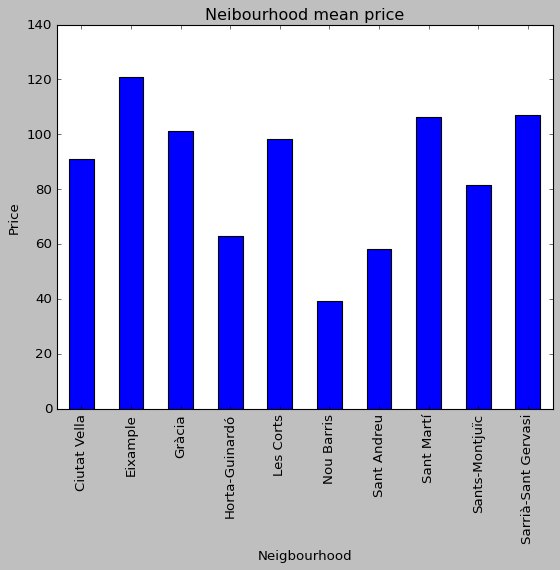

In [ ]:
grouped_df = data[data['price'] < 1000].groupby("neighbourhood_group_cleansed")
mean_df = grouped_df['price'].mean()
mean_df.plot(kind="bar")
plt.xlabel('Neigbourhood', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('Neibourhood mean price')

Text(0, 0.5, 'Price')

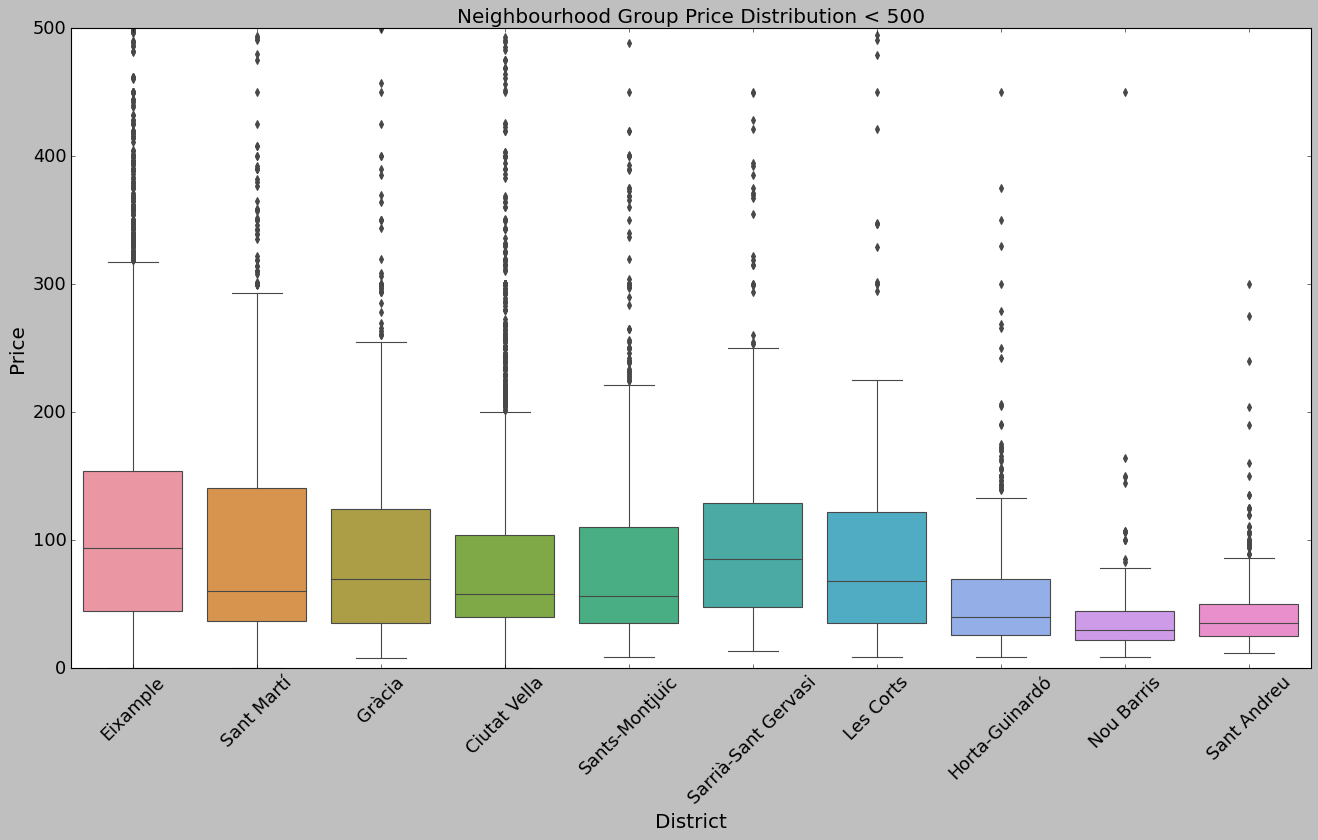

In [ ]:
a4_dims = (20, 10)
fig, ax = plt.subplots(figsize=a4_dims)
plot1=sns.boxplot(ax=ax,data=data[data['price'] < 500], x='neighbourhood_group_cleansed', y='price')
plot1.set_title("Neighbourhood Group Price Distribution < 500", fontsize=18)
plot1.set_xlabel('District', fontsize=18)
plt.xticks(fontsize=16, rotation=45)
plt.yticks(fontsize=16)

plot1.set_ylabel('Price', fontsize=18)

Text(0.5, 1.0, 'Density and distribution of prices for each neighbourhood group')

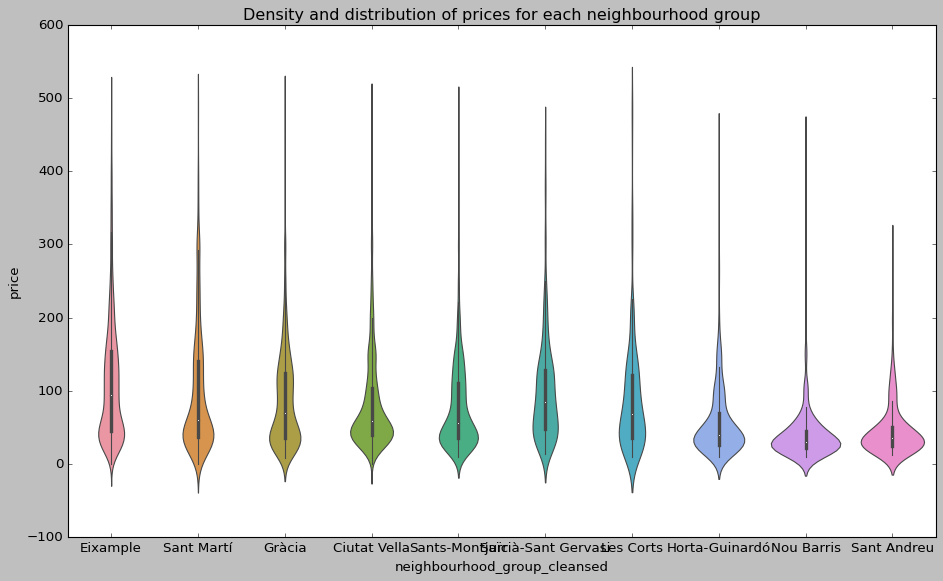

In [ ]:
a4_dims = (14, 8)
fig, ax = plt.subplots(figsize=a4_dims)
plot1=sns.violinplot(ax=ax,data=data[data['price'] < 500], x='neighbourhood_group_cleansed', y='price')
plot1.set_title('Density and distribution of prices for each neighbourhood group')

## Host

In [ ]:
top_host=data.host_id.value_counts().head(10)
top_host

4459553      174
170716140    165
157250994    161
1447144      126
265193861    123
158023606    120
299462        98
396363        92
36607755      91
32037490      88
Name: host_id, dtype: int64

Text(0.5, 1.0, 'Top hosts with the most listings')

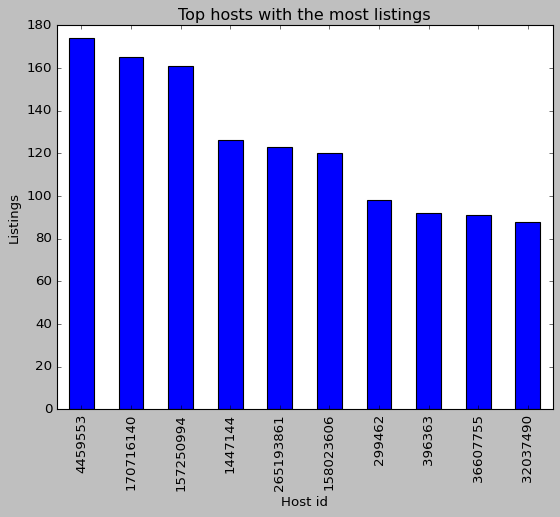

In [ ]:
top_host.plot(kind="bar")
plt.xlabel('Host id', fontsize=12)
plt.ylabel('Listings', fontsize=12)
plt.title('Top hosts with the most listings')

### Nan Values

In [ ]:
data_nan = pd.DataFrame(columns=['name', 'missing values'])
i = 0
for c in data.columns:
  na = data[c].isnull().sum()
  if na > 0:
    i+=1
    data_nan.loc[i] = [c, na]

In [ ]:
data_nan.head(10)

,name,missing values
1,name,10
2,description,132
3,neighborhood_overview,6678
4,host_name,49
5,host_since,49
6,host_location,66
7,host_about,6434
8,host_response_time,4746
9,host_response_rate,4746
10,host_acceptance_rate,5243


Text(0.5, 1.0, 'Top 10 columns with more missing values')

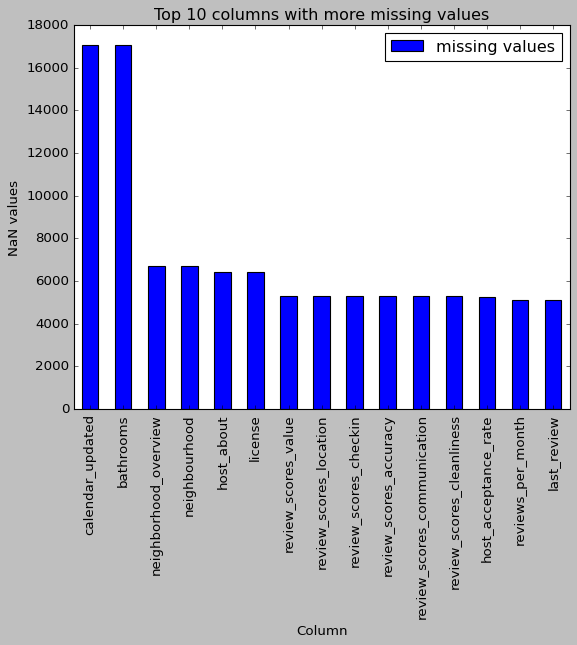

In [ ]:
data_nan.sort_values(by='missing values', ascending=False).head(15).plot(kind='bar', x="name")
plt.xlabel('Column', fontsize=12)
plt.ylabel('NaN values', fontsize=12)
plt.title('Top 10 columns with more missing values')

## Dades ocupació Airbnb

In [ ]:
ocupation = pd.read_csv('https://github.com/paubernabe/data/blob/main/calendar_july.csv.gz?raw=true', compression='gzip')

In [ ]:
ocupation.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,275889,2021-07-07,f,$287.00,$287.00,32.0,365.0
1,71736,2021-07-08,t,$62.00,$62.00,32.0,730.0
2,71736,2021-07-09,t,$62.00,$62.00,32.0,730.0
3,71736,2021-07-10,t,$62.00,$62.00,32.0,730.0
4,71736,2021-07-11,t,$62.00,$62.00,32.0,730.0


In [ ]:
calendar_aug = ocupation
date_mask_aug = (calendar_aug['date'] >= '2021-08-01') & (calendar_aug['date'] <= '2021-08-31')
calendar_aug = calendar_aug[date_mask_aug]
y = calendar_aug[['listing_id', 'available']]
y['busy'] = y.available.map( lambda x: 0 if x == 't' else 1)

y = y.groupby('listing_id').agg({'busy': np.sum})

y = y.reset_index(drop = False)
y.columns = ['id', 'busy_august']

y.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,id,busy_august
0,18674,31
1,23197,0
2,32711,31
3,34241,31
4,34981,18


In [ ]:
print(y['busy_august'].value_counts())

31    6701
0     3858
30     395
14     282
7      270
28     258
29     251
15     246
25     245
17     243
21     242
27     242
20     241
19     238
24     236
18     231
23     229
16     221
26     215
6      209
11     196
10     194
8      191
22     188
13     187
12     168
9      166
1      161
5      160
4      147
3      141
2      126
Name: busy_august, dtype: int64


In [ ]:
grouped_y = y.groupby('busy_august').count()

Text(0.5, 1.0, 'August listing occupation')

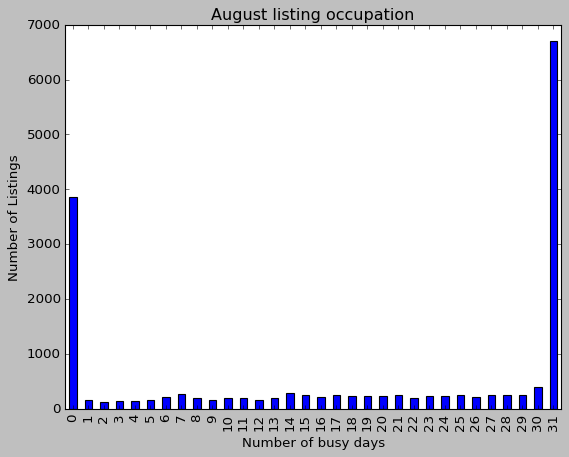

In [ ]:
grouped_y.plot(kind='bar', legend=False)
plt.xlabel('Number of busy days', fontsize=12)
plt.ylabel('Number of Listings', fontsize=12)
plt.title('August listing occupation')

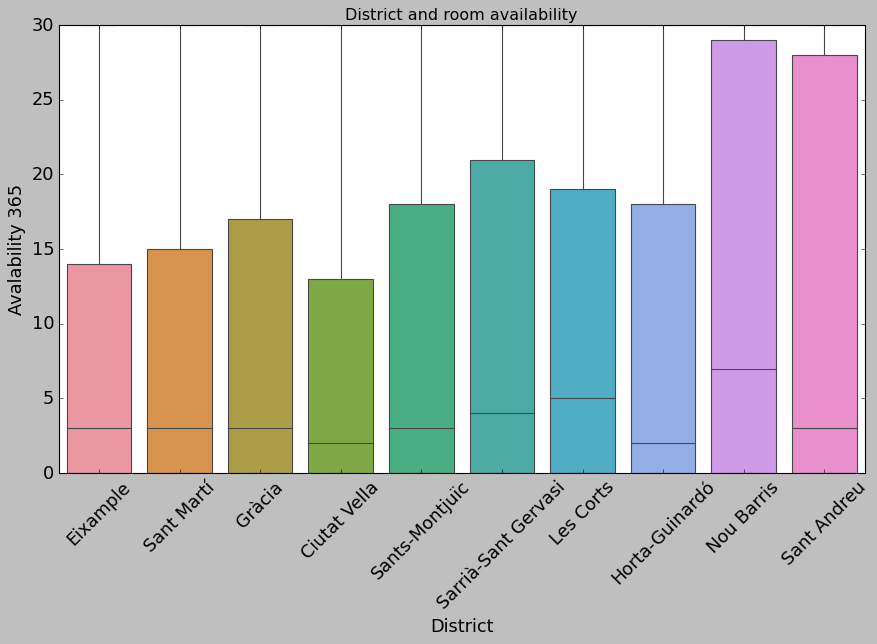

In [ ]:
plt.style.use('classic')
plt.figure(figsize=(13,7))
plt.title("District and room availability")
sns.boxplot(data=data, x='neighbourhood_group_cleansed',y='availability_30')
plt.xlabel('District', fontsize=16)
plt.ylabel('Avalability 365', fontsize=16)
plt.xticks(fontsize=16, rotation=45)
plt.yticks(fontsize=16)
plt.show()

## Reviews

In [ ]:
rev = data[['id','number_of_reviews']].sort_values(by='number_of_reviews', ascending=False)
rev.head(10)

,id,number_of_reviews
548,988917,831
617,1098571,740
526,959880,696
111,297066,686
525,959840,607
574,1036032,605
583,1060614,564
1679,3763410,563
513,950784,555
587,1064989,553


Text(0.5, 1.0, 'Top 10 most reviewed listings')

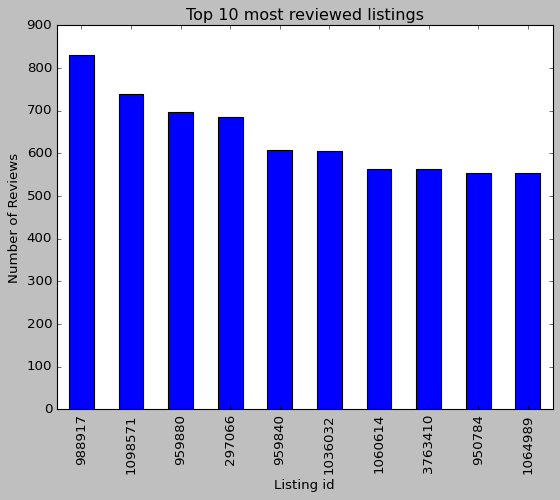

In [ ]:
rev.head(10).plot(x='id', y='number_of_reviews', kind='bar', legend=False)
plt.xlabel('Listing id', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.title('Top 10 most reviewed listings')

In [ ]:
data['review_scores_value'].mean()

4.518299949074845

In [ ]:
bnb_reviews = pd.read_csv('https://github.com/paubernabe/data/blob/main/reviews.csv.gz?raw=true', compression='gzip')

In [ ]:
bnb_reviews

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,18674,4808211,2013-05-27,4841196,Caron,"Great location. Clean, spacious flat. Would re..."
1,18674,10660311,2014-03-02,11600277,Juan Carlos,Mi mejor recomendación para este departamento....
2,18674,41087522,2015-08-04,35231385,Shlomi,"Big apartment, well equipped.\r<br/>Very good ..."
3,18674,81000756,2016-06-20,23223644,Joost,The Check in was fast and flexible. The price ...
4,18674,278588962,2018-06-18,4756672,Marius,Great location and enough space in the apartme...
...,...,...,...,...,...,...
541339,51856861,438136462860415266,2021-08-27,10825731,Cesar Eduardo,"Muy buen host, siemore atento y amable"
541340,51878702,440364869828843070,2021-08-30,100784279,Carrie,"This is a lovely room, the addition of a fridg..."
541341,51878702,441771410755550310,2021-09-01,191305109,Luciano,"excelente todo , la amabilidad de Lorenzo , la..."
541342,51878702,444706075446051095,2021-09-05,355496209,Győry,"Amazing place and host, the location was perfe..."


In [ ]:
import re, string
def clean_text(x):

    if type(x) == str:
      
      x = re.sub('<.*?>', ' ', x)
      x = re.sub(r'\w*\d\w*', '', x)
      x = x.translate(str.maketrans(' ',' ',string.punctuation))
      x = re.sub("\n"," ",x)
      x = x.lower()
      
      if len(x) == 0 or x == '':
        return float('nan')
      
      t = ''
      for word in x.split():
          t += ' ' + word
      return t
    return float('nan')

bnb_reviews['comments'] = bnb_reviews['comments'].apply(clean_text)

In [ ]:
bnb_reviews = bnb_reviews.dropna()

In [ ]:
def get_length_all_reviews(sentences):
    '''
    Returns a list of length of all reviews
    Used for plotting histogram
    '''
    lengths = [len(i.split(' ')) for i in sentences]
    return lengths


In [ ]:
def plot_histogram(sentence_lengths, x_dim):
    '''
    Plots histogram of length of all sentences
    '''
    plt.hist(sentence_lengths, 50, [0, x_dim])
    plt.xlabel('Review length (words)')
    plt.ylabel('Frequency')
    plt.title('Review Lengths (Words per review)')
    plt.show()



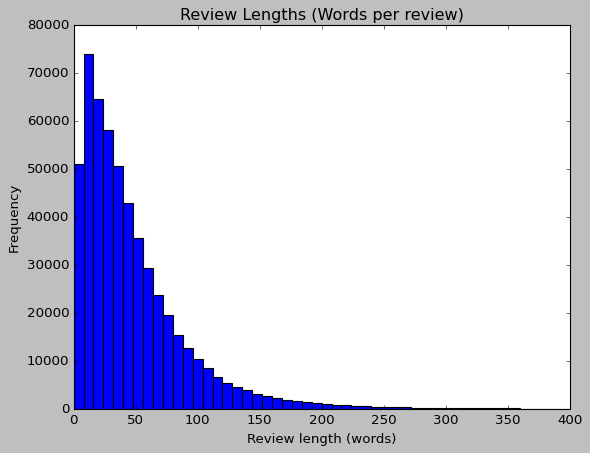

In [ ]:
t_len = get_length_all_reviews(bnb_reviews['comments'])
plot_histogram(t_len, 400)

In [ ]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

english_stopwords = stopwords.words('english')
spanish_stop = stopwords.words('spanish')
german_stop = stopwords.words('german')
french_stop = stopwords.words('french')

stop = english_stopwords + spanish_stop + german_stop + french_stop

stopwords = set(stop)

wc = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(' '.join(bnb_reviews['comments']))



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


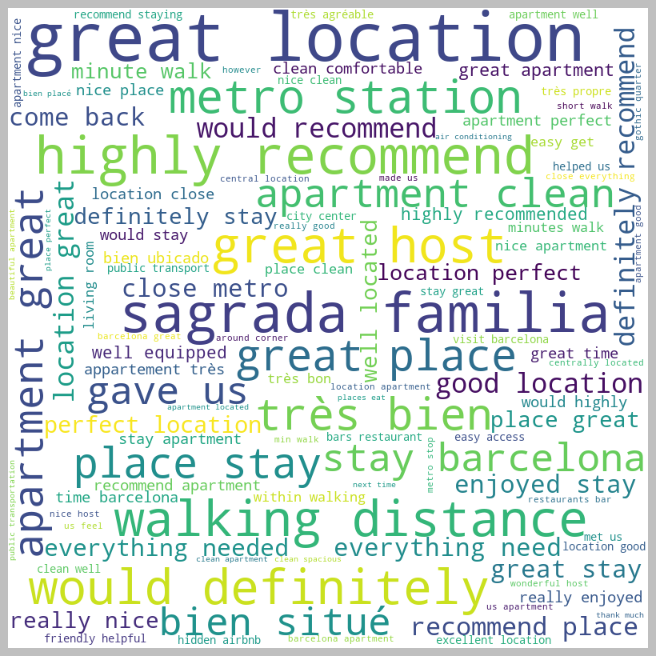

In [ ]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)

In [ ]:
plt.show()

### Dades TripAdvisor

In [ ]:
tripadvisor = pd.read_csv('https://github.com/paubernabe/data/blob/main/tripadvisor_hotel_reviews.csv?raw=true')
tripadvisor_2 = pd.read_csv('https://github.com/paubernabe/data/blob/main/tripadvisor-positive.csv?raw=true')
tripadvisor_neg = pd.read_csv('https://github.com/paubernabe/data/blob/main/tripadvisor-negative.csv?raw=true')

In [ ]:
tripadvisor = pd.concat([tripadvisor, tripadvisor_2, tripadvisor_neg], ignore_index=True)

In [ ]:
tripadvisor

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4.0
1,ok nothing special charge diamond member hilto...,2.0
2,nice rooms not 4* experience hotel monaco seat...,3.0
3,"unique, great stay, wonderful time hotel monac...",5.0
4,"great stay great stay, went seahawk game aweso...",5.0
...,...,...
53408,I have never seen such a messy hostel. my frie...,1.0
53409,"Peccato. La struttura è anche bella, posizione...",2.0
53410,Wir haben hier drei Nächte verbracht und waren...,1.0
53411,"Es mi primera mala puntuación, pero creo que s...",1.0


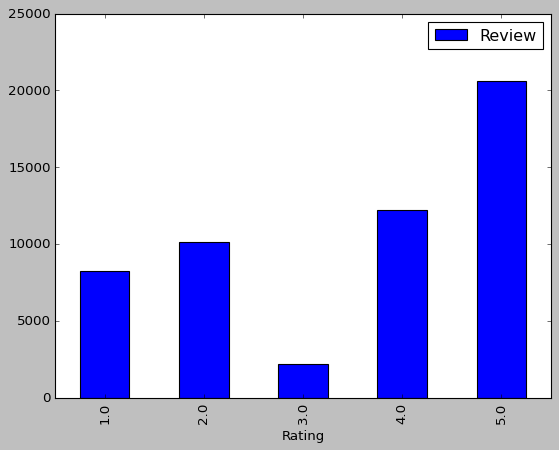

In [ ]:
tad_score = tripadvisor.groupby('Rating').count()
tad_score.plot(kind='bar')

In [ ]:
tripadvisor['Review'] = tripadvisor['Review'].apply(clean_text)

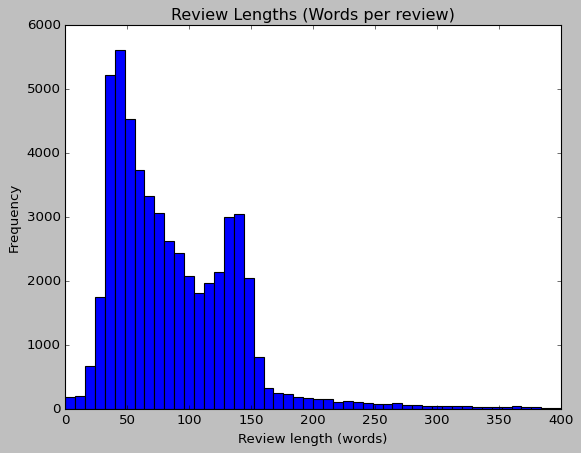

In [ ]:
t_len = get_length_all_reviews(tripadvisor['Review'])
plot_histogram(t_len, 400)

In [ ]:
tripadvisor = tripadvisor.dropna()

In [ ]:
wc = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(' '.join(tripadvisor['Review']))

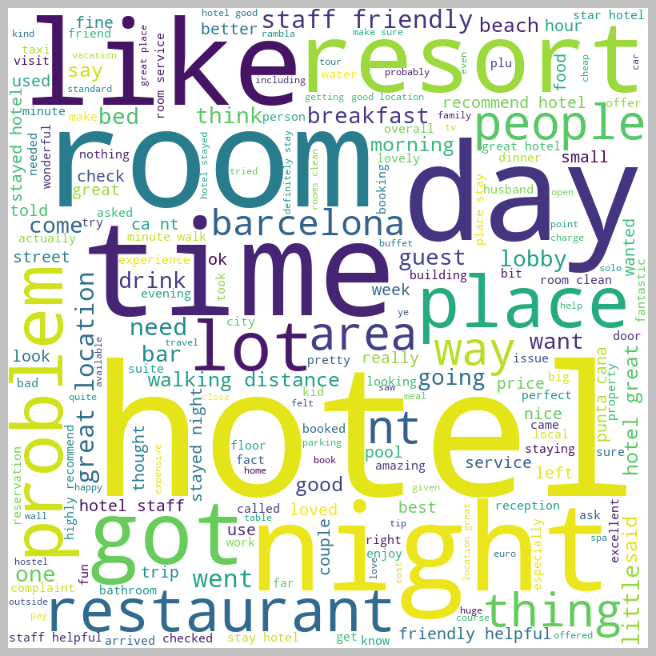

In [ ]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

## Dades Barcelona Open data

- Transport

In [ ]:
transport = pd.read_csv('https://github.com/paubernabe/data/blob/main/TRANSPORTS.csv?raw=true')
print(transport.shape)
transport.head(5)

(642, 16)


,CODI_CAPA,CAPA_GENERICA,NOM_CAPA,ED50_COORD_X,ED50_COORD_Y,ETRS89_COORD_X,ETRS89_COORD_Y,LONGITUD,LATITUD,EQUIPAMENT,DISTRICTE,BARRI,NOM_DISTRICTE,NOM_BARRI,ADRECA,TELEFON
0,K001,Transports i serveis relacionats,Metro i línies urbanes FGC,428480.365,4586484.614,428388.453,4586283.641,2.142987,41.424923,"METRO (L3, L5) - VALL D'HEBRON (C. de les Bass...",7.0,41.0,Horta-Guinardó,la Vall d'Hebron,NaN,NaN
1,K002,Transports i serveis relacionats,Ferrocarrils Generalitat (FGC),429726.943,4582853.670,429635.018,4582652.730,2.158326,41.392331,FGC - PROVENÇA (C. de Provença)-,2.0,8.0,Eixample,l'Antiga Esquerra de l'Eixample,NaN,NaN
2,K001,Transports i serveis relacionats,Metro i línies urbanes FGC,426477.889,4583649.008,426385.994,4583448.062,2.119370,41.399203,FGC (L6) - REINA ELISENDA (Sortida Duquesa d'O...,5.0,23.0,Sarrià-Sant Gervasi,Sarrià,NaN,NaN
3,K001,Transports i serveis relacionats,Metro i línies urbanes FGC,427818.595,4583478.761,427726.688,4583277.816,2.135427,41.397791,FGC (L6) - LA BONANOVA-,5.0,26.0,Sarrià-Sant Gervasi,Sant Gervasi - Galvany,NaN,NaN
4,K001,Transports i serveis relacionats,Metro i línies urbanes FGC,432051.444,4589400.176,431959.500,4589199.175,2.185391,41.451492,METRO (L11) - CASA DE L'AIGUA (C. Vila-Real)-,8.0,53.0,Nou Barris,la Trinitat Nova,NaN,NaN


Text(0.5, 1.0, 'Ubicació de les estacions de transport públic de Barcelona')

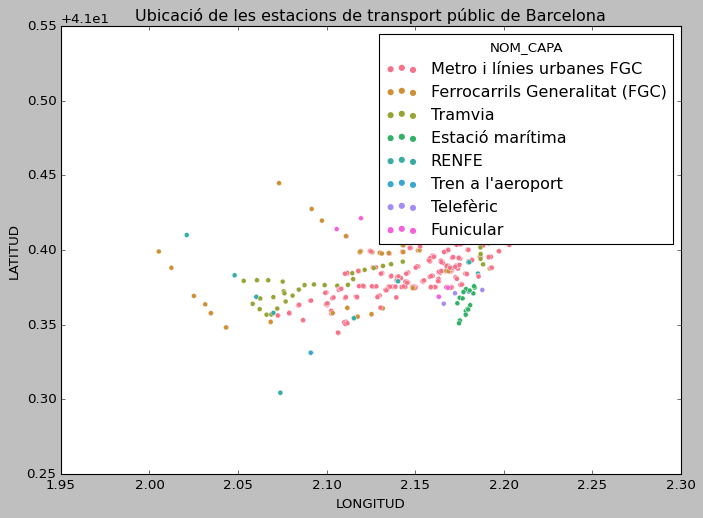

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="LONGITUD", y="LATITUD", data=transport, hue='NOM_CAPA')
plt.title('Ubicació de les estacions de transport públic de Barcelona')

In [ ]:
restaurants = pd.read_csv('https://github.com/paubernabe/data/blob/main/rest.csv?raw=true')
print(restaurants.shape)
restaurants.head(5)

(2504, 36)


,register_id,name,institution_id,institution_name,created,modified,addresses_roadtype_id,addresses_roadtype_name,addresses_road_id,addresses_road_name,addresses_start_street_number,addresses_end_street_number,addresses_neighborhood_id,addresses_neighborhood_name,addresses_district_id,addresses_district_name,addresses_zip_code,addresses_town,addresses_main_address,addresses_type,values_id,values_attribute_id,values_category,values_attribute_name,values_value,values_outstanding,values_description,secondary_filters_id,secondary_filters_name,secondary_filters_fullpath,secondary_filters_tree,secondary_filters_asia_id,geo_epgs_25831_x,geo_epgs_25831_y,geo_epgs_4326_x,geo_epgs_4326_y
0,﻿2122182514,Restaurant Chido One,NaN,NaN,2002-05-02T00:00:00+02:00,2021-03-03T22:14:06.509761+01:00,NaN,NaN,341908,C Torrijos,30.0,NaN,31,la Vila de Gràcia,6,Gràcia,8012,BARCELONA,True,NaN,134757.0,20001.0,Telèfons,Tel.,932850335,True,NaN,60731068,Restaurants,Planol BCN >> Restaurants >> Restaurants >> Re...,651,65103007000000,429706.567847,4.583870e+06,41.403301,2.159041
1,﻿2064171550,Labona Pizza *Gal·lileu,NaN,NaN,2002-03-05T00:00:00+01:00,2021-07-21T12:29:38.986716+02:00,NaN,NaN,138802,Carrer de Galileu,326.0,NaN,19,les Corts,4,Les Corts,8028,Barcelona,True,NaN,134615.0,20001.0,Telèfons,Tel.,933222040,True,NaN,60731068,Restaurants,Planol BCN >> Restaurants >> Restaurants >> Re...,651,65103007000000,427366.054990,4.581993e+06,41.386187,2.131268
2,﻿99400276550,Restaurant Pez Vela Chiringuito,NaN,NaN,2011-09-02T12:07:02+02:00,2021-03-03T22:14:28.487962+01:00,NaN,NaN,701644,Pg Mare Nostrum,19.0,NaN,3,la Barceloneta,1,Ciutat Vella,8039,BARCELONA,True,NaN,224661.0,20001.0,Telèfons,Tel.,932216317,True,NaN,60731068,Restaurants,Planol BCN >> Restaurants >> Restaurants >> Re...,651,65103007000000,432247.321931,4.580054e+06,41.369151,2.189861
3,﻿99400264196,Restaurant Udon *Glòries,NaN,NaN,2011-02-07T00:00:00+01:00,2021-03-03T22:14:49.237116+01:00,NaN,NaN,144601,Av Diagonal,208.0,NaN,66,el Parc i la Llacuna del Poblenou,10,Sant Martí,8018,BARCELONA,True,NaN,223254.0,20001.0,Telèfons,Tel.,934861314,True,NaN,60731068,Restaurants,Planol BCN >> Restaurants >> Restaurants >> Re...,651,65103007000000,432506.888609,4.584029e+06,41.404976,2.192521
4,﻿75990341919,Bar Restaurant Marcelino 16 *Diputació,NaN,NaN,1996-09-18T00:00:00+02:00,2021-03-03T22:14:35.713828+01:00,NaN,NaN,100800,C Diputació,41.0,NaN,9,la Nova Esquerra de l'Eixample,2,Eixample,8015,BARCELONA,True,NaN,149688.0,20001.0,Telèfons,Tel.,934246267,True,NaN,60731068,Restaurants,Planol BCN >> Restaurants >> Restaurants >> Re...,651,65103007000000,429109.288208,4.581221e+06,41.379388,2.152206


Text(0.5, 1.0, 'Ubicació dels diferents locals de restauració de Barcelona')

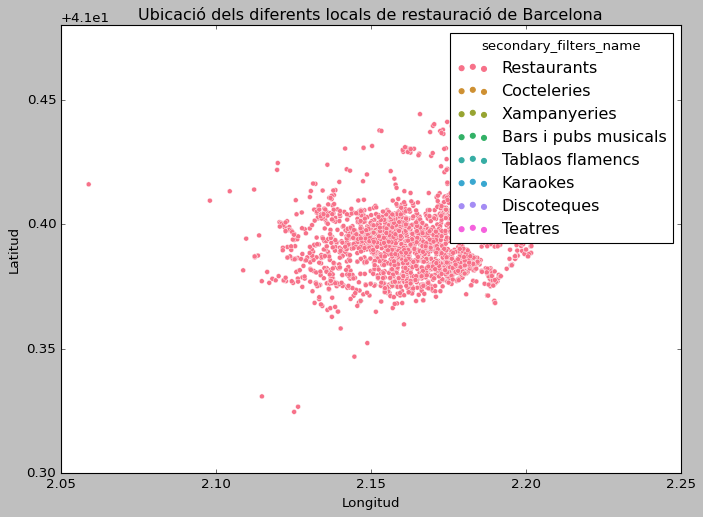

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="geo_epgs_4326_y", y="geo_epgs_4326_x", data=restaurants, hue='secondary_filters_name')
plt.xlabel('Longitud', fontsize=12)
plt.ylabel('Latitud', fontsize=12)
plt.title('Ubicació dels diferents locals de restauració de Barcelona')